**Project By AYUSH KESARWANI**

**Import Required Libraries**

In [ ]:
try:
    import sys,os
    import tensorflow as tf
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    print("----Libraries Loaded----")
except:
    print("----Libraries Not Loaded----")

----Libraries Loaded----


**Loading, Reading, and Pre-Processing Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir("/content/drive/My Drive/Orange Fruit Detection Using Image Segmentation")


In [ ]:
os.listdir()

['Dataset',
 '__pycache__',
 'build_model.py',
 'Image Segmentaion',
 'Images',
 'Saved_Models',
 'Accuracy_Loss_Images',
 'Layer_Architecture',
 'Orange_Fruit_Classification.ipynb']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1.0 / 255, 
        rotation_range=30,  
        zoom_range = 0.15,  
        width_shift_range=0.10,  
        height_shift_range=0.10,  
        horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    '/content/drive/My Drive/Orange Fruit Detection Using Image Segmentation/Dataset/train',
    target_size=(64,64),
    batch_size=10,
    class_mode='binary')

val_set = val_datagen.flow_from_directory(
    '/content/drive/My Drive/Orange Fruit Detection Using Image Segmentation/Dataset/validation',
    target_size=(64,64),
    batch_size=10,
    class_mode='binary')

Found 1062 images belonging to 2 classes.
Found 526 images belonging to 2 classes.


**Building Model**

In [ ]:
from build_model import classifier_model

model = classifier_model()

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 60, 60, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 64)        3

**Compiling and Training Model**

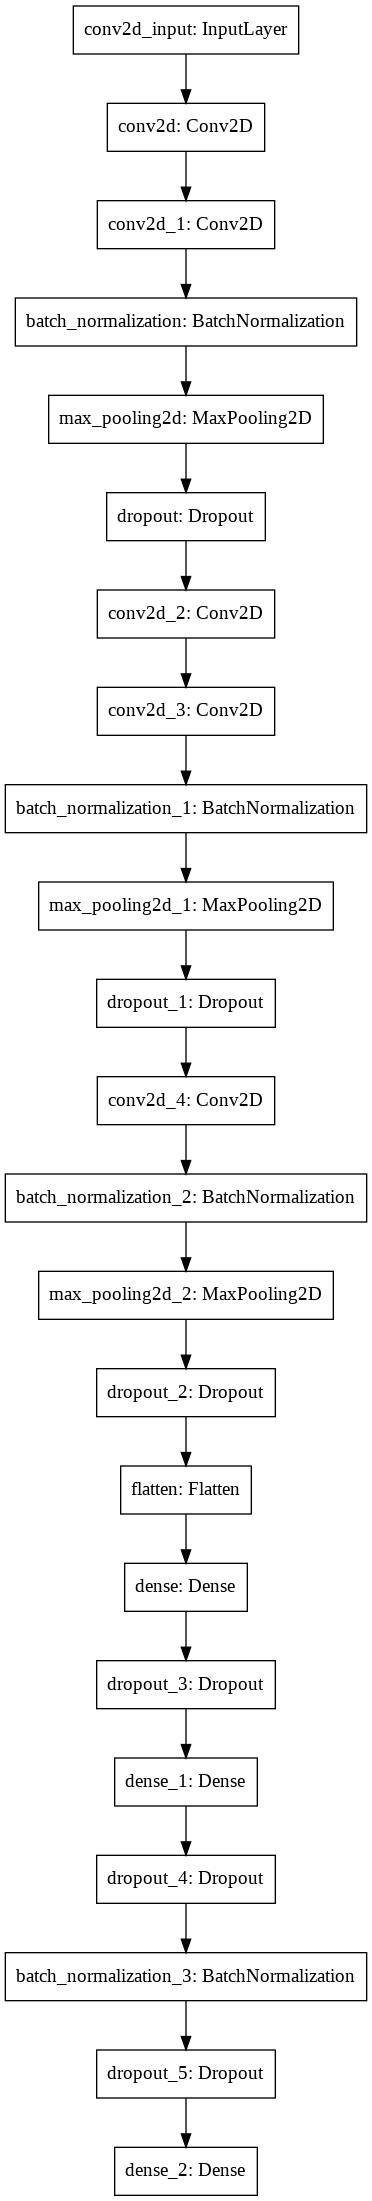

In [ ]:

from keras.utils.vis_utils import plot_model

plot_model(model, to_file='CNN_Layers.png')

In [ ]:
with tf.device('/GPU:0'):
    history = model.fit(
        training_set,
        steps_per_epoch=1062//20,
        epochs=200, 
        verbose=1,
        validation_data = val_set,
        validation_steps=526//20
        #callbacks=[callback]
    )

Epoch 1/200
52/53 [============================>.] - ETA: 0s - loss: 0.2827 - accuracy: 0.8769

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


53/53 [==============================] - 6s 113ms/step - loss: 0.2793 - accuracy: 0.8792 - val_loss: 0.3101 - val_accuracy: 0.9538
Epoch 2/200
53/53 [==============================] - 6s 108ms/step - loss: 0.2810 - accuracy: 0.8870 - val_loss: 2.7516 - val_accuracy: 0.4577
Epoch 3/200
53/53 [==============================] - 5s 104ms/step - loss: 0.2341 - accuracy: 0.8962 - val_loss: 0.3730 - val_accuracy: 0.8077
Epoch 4/200
53/53 [==============================] - 5s 100ms/step - loss: 0.2233 - accuracy: 0.9075 - val_loss: 0.1173 - val_accuracy: 0.9654
Epoch 5/200
53/53 [==============================] - 5s 98ms/step - loss: 0.2354 - accuracy: 0.9132 - val_loss: 0.7834 - val_accuracy: 0.4808
Epoch 6/200
53/53 [==============================] - 5s 104ms/step - loss: 0.2719 - accuracy: 0.9061 - val_loss: 0.1134 - val_accuracy: 0.9654
Epoch 7/200
53/53 [==============================] - 5s 100ms/step - loss: 0.2651 - accuracy: 0.8889 - val_loss: 0.5724 - val_accuracy: 0.7346
Epoch 8/200


**Ploting Results**

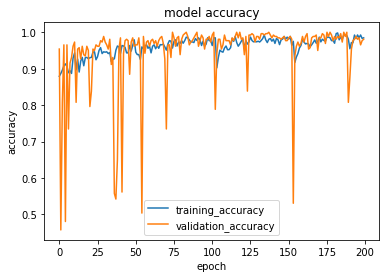

In [ ]:
plt.plot(history.history['accuracy'][0:220])
plt.plot(history.history['val_accuracy'][0:220])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training_accuracy', 'validation_accuracy'])
plt.show()

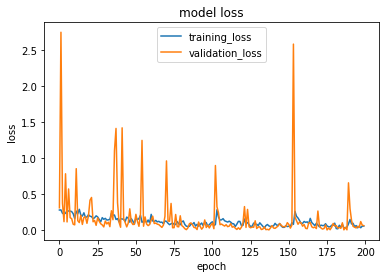

In [ ]:
plt.plot(history.history['loss'][0:220])
plt.plot(history.history['val_loss'][0:220])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training_loss', 'validation_loss'])
plt.show()

**Save Model**

In [ ]:
m_json = model.to_json()  
with open("CNN_model.json", "w") as json_file:  
    json_file.write(m_json)  
model.save_weights("CNN_model_Weights.h5") 

**Loading and Testing Model**

In [ ]:
from tensorflow.keras.models import load_model
from keras.models import model_from_json
from tensorflow.keras.preprocessing.image import load_img, img_to_array

cnnmodel = model_from_json(open("Saved_Models/CNN_model.json", "r").read())  
cnnmodel.load_weights('Saved_Models/CNN_model_Weights.h5')


**Loading Image For Prediction**

In [ ]:
def process_image(path):
  img = load_img(path, target_size = (64,64))
  img_tensor = img_to_array(img)
  img_tensor = np.expand_dims(img_tensor, axis = 0)
  img_tensor/=255.0
  return img_tensor

path1 = 'Images/kiwi.jpg'
img_original1 = load_img(path1)
path2 = 'Images/orange3.jpg'
img_original2 = load_img(path2)
path3 = 'Images/xyz2.jpg'
img_original3 = load_img(path3)

**Predicting**

In [ ]:
pred1 = cnnmodel.predict(process_image(path1))
print("Pred1 = ",pred1)

pred2 = cnnmodel.predict(process_image(path2))
print("Pred2 = ",pred2)

pred3 = cnnmodel.predict(process_image(path3))
print("Pred3 = ",pred3)

Pred1 =  [[0.0001325]]
Pred2 =  [[0.9997265]]
Pred3 =  [[0.9664659]]


**Showing Results**

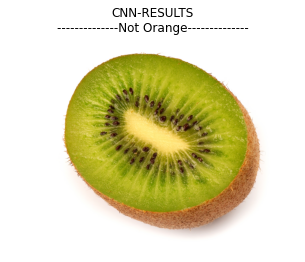

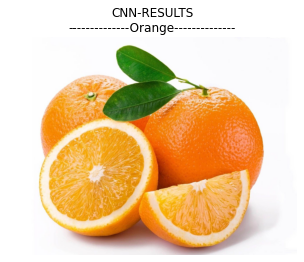

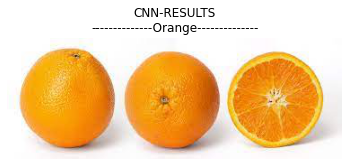

In [ ]:
def show(pred,img):

  if pred>0.5: str = 'CNN-RESULTS\n--------------Orange--------------'
  else: str = 'CNN-RESULTS\n--------------Not Orange--------------'

  plt.imshow(img)
  plt.axis('off')
  plt.title(str)
  plt.show()

show(pred1,img_original1)
show(pred2,img_original2)
show(pred3,img_original3)

# Using VGG-19 Model

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.utils.vis_utils import plot_model
from tensorflow.keras import layers


In [ ]:
vmodel = VGG16(input_shape = (64, 64, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

for layer in vmodel.layers:
    layer.trainable = False

In [ ]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(vmodel.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(vmodel.input, x)

model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])


In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0   

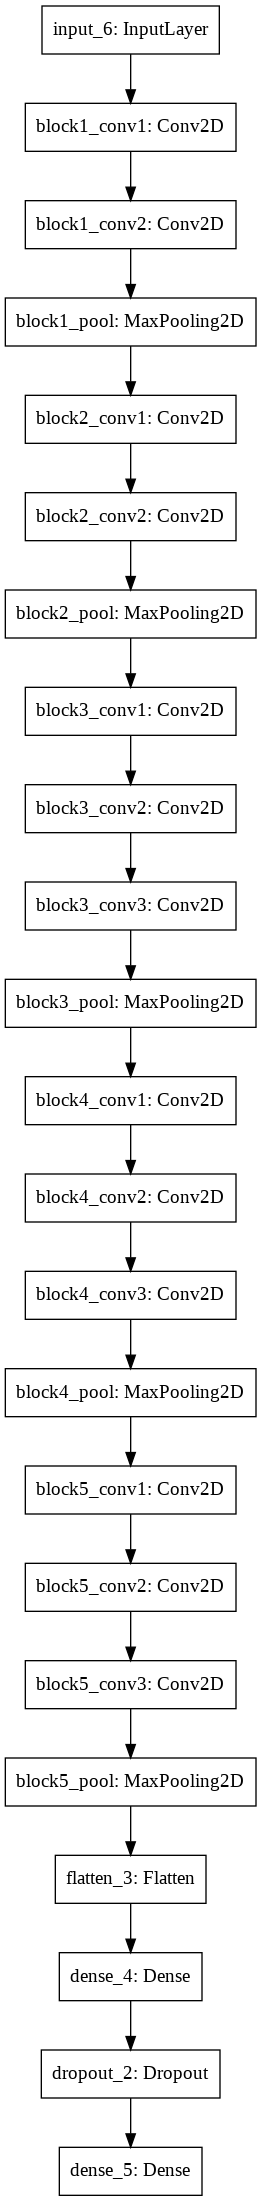

In [ ]:
plot_model(model, to_file='vgg.png')

In [ ]:
vgghist = model.fit(training_set, validation_data = val_set, steps_per_epoch=1062//20, epochs = 15,validation_steps=526//20)


Epoch 1/15
53/53 [==============================] - ETA: 0s - loss: 0.6535 - acc: 0.6162

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


53/53 [==============================] - 36s 675ms/step - loss: 0.6527 - acc: 0.6170 - val_loss: 0.4342 - val_acc: 0.7654
Epoch 2/15
53/53 [==============================] - 21s 393ms/step - loss: 0.4568 - acc: 0.8094 - val_loss: 0.3514 - val_acc: 0.8462
Epoch 3/15
53/53 [==============================] - 8s 153ms/step - loss: 0.3848 - acc: 0.8491 - val_loss: 0.3476 - val_acc: 0.8115
Epoch 4/15
53/53 [==============================] - 8s 158ms/step - loss: 0.3457 - acc: 0.8550 - val_loss: 0.2499 - val_acc: 0.8885
Epoch 5/15
53/53 [==============================] - 7s 128ms/step - loss: 0.3184 - acc: 0.8643 - val_loss: 0.2119 - val_acc: 0.9308
Epoch 6/15
53/53 [==============================] - 5s 103ms/step - loss: 0.2428 - acc: 0.9140 - val_loss: 0.1792 - val_acc: 0.9462
Epoch 7/15
53/53 [==============================] - 5s 102ms/step - loss: 0.2838 - acc: 0.8797 - val_loss: 0.1608 - val_acc: 0.9500
Epoch 8/15
53/53 [==============================] - 6s 114ms/step - loss: 0.2000 - ac

# Plotting VGG-19 training accuracy and loss

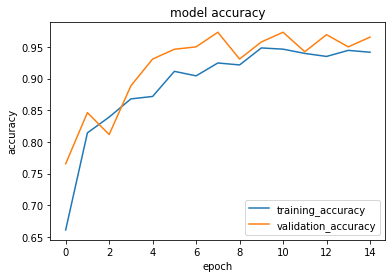

In [ ]:
plt.plot(vgghist.history['acc'][0:220])
plt.plot(vgghist.history['val_acc'][0:220])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training_accuracy', 'validation_accuracy'])
plt.savefig("VGG_accuracy.png")
plt.show()

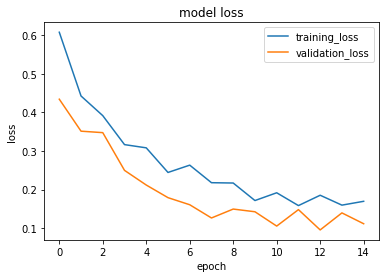

In [ ]:
plt.plot(vgghist.history['loss'][0:220])
plt.plot(vgghist.history['val_loss'][0:220])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training_loss', 'validation_loss'])
plt.savefig("VGG_loss.png")
plt.show()

# Saving Model and Loading Model

In [ ]:
from tensorflow.keras.models import load_model
from keras.models import model_from_json
from tensorflow.keras.preprocessing.image import load_img, img_to_array

m_json = model.to_json()  
with open("VGG_model.json", "w") as json_file:  
    json_file.write(m_json)  
model.save_weights("VGG_model_Weights.h5") 

In [ ]:
VGGmodel = model_from_json(open("Saved_Models/VGG_model.json", "r").read())  
VGGmodel.load_weights('Saved_Models/VGG_model_Weights.h5')

# Testing and Predicting

In [ ]:
def process_image(path):
  img = load_img(path, target_size = (64,64))
  img_tensor = img_to_array(img)
  img_tensor = np.expand_dims(img_tensor, axis = 0)
  img_tensor/=255.0
  return img_tensor

path1 = 'Images/kiwi.jpg'
img_original1 = load_img(path1)
path2 = 'Images/orange3.jpg'
img_original2 = load_img(path2)
path3 = 'Images/xyz2.jpg'
img_original3 = load_img(path3)

In [ ]:
pred1 = VGGmodel.predict(process_image(path1))
print("Pred1 = ",pred1)

pred2 = VGGmodel.predict(process_image(path2))
print("Pred2 = ",pred2)

pred3 = VGGmodel.predict(process_image(path3))
print("Pred3 = ",pred3)

Pred1 =  [[0.20569277]]
Pred2 =  [[0.9884007]]
Pred3 =  [[0.93040955]]


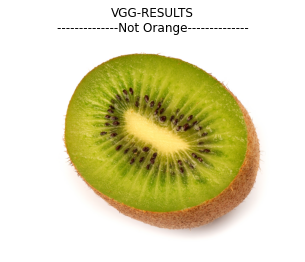

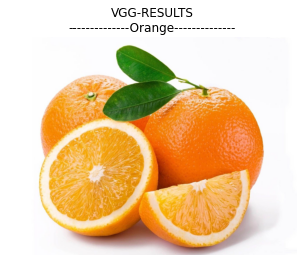

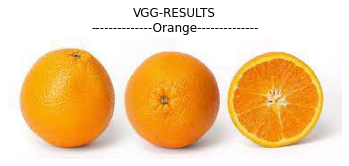

In [ ]:
def show(pred,img):

  if pred>0.5: str = 'VGG-RESULTS\n--------------Orange--------------'
  else: str = 'VGG-RESULTS\n--------------Not Orange--------------'

  plt.imshow(img)
  plt.axis('off')
  plt.title(str)
  plt.show()

show(pred1,img_original1)
show(pred2,img_original2)
show(pred3,img_original3)

# Using MobileNetV2 Model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

Base_model = tf.keras.applications.MobileNetV2(input_shape=(224,224,3), include_top=False, weights='imagenet')

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
Base_model.trainable = False

In [ ]:
mnv2model = tf.keras.Sequential([Base_model, keras.layers.GlobalAveragePooling2D(), keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
mnv2model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
mnv2model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


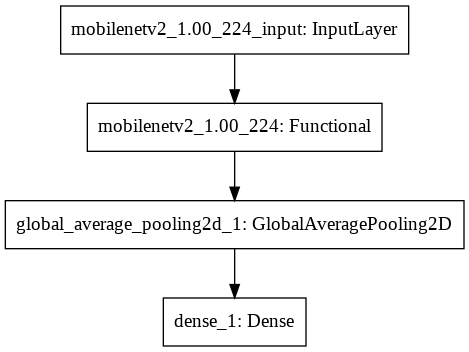

In [ ]:
plot_model(mnv2model, to_file='MobileNetv2_layers.png')

In [ ]:
epochs = 100
steps_per_epoch = 1062//20
validation_steps = 526//20


mnv2hist = mnv2model.fit(training_set,
                              steps_per_epoch = steps_per_epoch,
                              epochs=epochs,
                              workers=4,
                              validation_data=val_set,
                              validation_steps=validation_steps)

Epoch 1/100
53/53 [==============================] - 55s 969ms/step - loss: 0.7418 - accuracy: 0.6230 - val_loss: 0.5954 - val_accuracy: 0.7962
Epoch 2/100
53/53 [==============================] - ETA: 0s - loss: 0.5454 - accuracy: 0.7466

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


53/53 [==============================] - 21s 387ms/step - loss: 0.5451 - accuracy: 0.7466 - val_loss: 0.4808 - val_accuracy: 0.7962
Epoch 3/100
53/53 [==============================] - 9s 166ms/step - loss: 0.3733 - accuracy: 0.8678 - val_loss: 0.3531 - val_accuracy: 0.8500
Epoch 4/100
53/53 [==============================] - 6s 103ms/step - loss: 0.3973 - accuracy: 0.8334 - val_loss: 0.3012 - val_accuracy: 0.8769
Epoch 5/100
53/53 [==============================] - 6s 94ms/step - loss: 0.3687 - accuracy: 0.8663 - val_loss: 0.2001 - val_accuracy: 0.9346
Epoch 6/100
53/53 [==============================] - 5s 82ms/step - loss: 0.2896 - accuracy: 0.8990 - val_loss: 0.2709 - val_accuracy: 0.9038
Epoch 7/100
53/53 [==============================] - 5s 95ms/step - loss: 0.2229 - accuracy: 0.9173 - val_loss: 0.1934 - val_accuracy: 0.9231
Epoch 8/100
53/53 [==============================] - 6s 101ms/step - loss: 0.2190 - accuracy: 0.9118 - val_loss: 0.1964 - val_accuracy: 0.9115
Epoch 9/100
5

# Plotting MobileNetV2 Training accuracy and loss

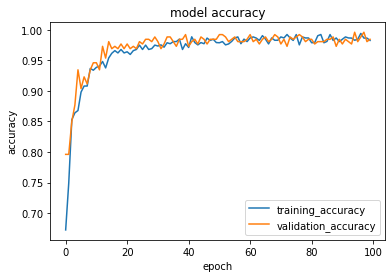

In [ ]:
plt.plot(mnv2hist.history['accuracy'][0:220])
plt.plot(mnv2hist.history['val_accuracy'][0:220])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training_accuracy', 'validation_accuracy'])
plt.savefig("MobileNetV2_accuracy.png")
plt.show()

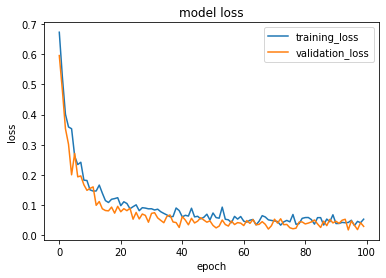

In [ ]:
plt.plot(mnv2hist.history['loss'][0:220])
plt.plot(mnv2hist.history['val_loss'][0:220])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training_loss', 'validation_loss'])
plt.savefig("MobileNetV2_loss.png")
plt.show()

# Saving and Loading Model

In [ ]:
from tensorflow.keras.models import load_model
from keras.models import model_from_json
from tensorflow.keras.preprocessing.image import load_img, img_to_array

m_json = mnv2model.to_json()  
with open("Mobilenet_model.json", "w") as json_file:  
    json_file.write(m_json)  
mnv2model.save_weights("Mobilenet_model_Weights.h5") 

In [ ]:
Mobilenetmodel = model_from_json(open("Saved_Models/Mobilenet_model.json", "r").read())  
Mobilenetmodel.load_weights('Saved_Models/Mobilenet_model_Weights.h5')

# Testing and Predicting

Pred1 =  [[0.01551262]]
Pred2 =  [[0.86861205]]
Pred3 =  [[0.8978918]]


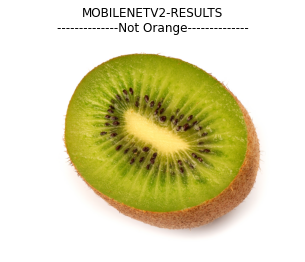

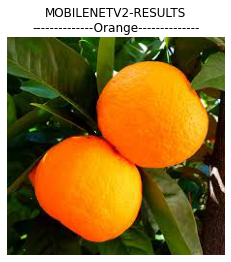

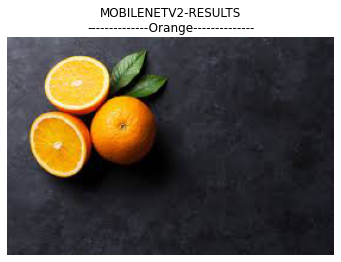

In [ ]:
def process_image(path):
  img = load_img(path, target_size = (224,224))
  img_tensor = img_to_array(img)
  img_tensor = np.expand_dims(img_tensor, axis = 0)
  img_tensor/=255.0
  return img_tensor

path1 = 'Images/kiwi.jpg'
img_original1 = load_img(path1)
path2 = 'Images/xyz8.jpg'
img_original2 = load_img(path2)
path3 = 'Images/xyz20.jpg'
img_original3 = load_img(path3)

pred1 = Mobilenetmodel.predict(process_image(path1))
print("Pred1 = ",pred1)

pred2 = Mobilenetmodel.predict(process_image(path2))
print("Pred2 = ",pred2)

pred3 = Mobilenetmodel.predict(process_image(path3))
print("Pred3 = ",pred3)

def show(pred,img):

  if pred>0.5: str = 'MOBILENETV2-RESULTS\n--------------Orange--------------'
  else: str = 'MOBILENETV2-RESULTS\n--------------Not Orange--------------'

  plt.imshow(img)
  plt.axis('off')
  plt.title(str)
  plt.show()

show(pred1,img_original1)
show(pred2,img_original2)
show(pred3,img_original3)

# Using DenseNet Model

In [ ]:
import keras
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Dense, Input, Activation, Dropout, GlobalAveragePooling2D, BatchNormalization, concatenate, AveragePooling2D
from keras.optimizers import Adam



def conv_layer(conv_x, filters):
    conv_x = BatchNormalization()(conv_x)
    conv_x = Activation('relu')(conv_x)
    conv_x = Conv2D(filters, (3, 3), kernel_initializer='he_uniform', padding='same', use_bias=False)(conv_x)
    conv_x = Dropout(0.2)(conv_x)

    return conv_x


def dense_block(block_x, filters, growth_rate, layers_in_block):
    for i in range(layers_in_block):
        each_layer = conv_layer(block_x, growth_rate)
        block_x = concatenate([block_x, each_layer], axis=-1)
        filters += growth_rate

    return block_x, filters


def transition_block(trans_x, tran_filters):
    trans_x = BatchNormalization()(trans_x)
    trans_x = Activation('relu')(trans_x)
    trans_x = Conv2D(tran_filters, (1, 1), kernel_initializer='he_uniform', padding='same', use_bias=False)(trans_x)
    trans_x = AveragePooling2D((2, 2), strides=(2, 2))(trans_x)

    return trans_x, tran_filters


def dense_net(filters, growth_rate, classes, dense_block_size, layers_in_block):
    input_img = Input(shape=(64, 64, 3))
    x = Conv2D(24, (3, 3), kernel_initializer='he_uniform', padding='same', use_bias=False)(input_img)

    dense_x = BatchNormalization()(x)
    dense_x = Activation('relu')(x)

    dense_x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(dense_x)
    for block in range(dense_block_size - 1):
        dense_x, filters = dense_block(dense_x, filters, growth_rate, layers_in_block)
        dense_x, filters = transition_block(dense_x, filters)

    dense_x, filters = dense_block(dense_x, filters, growth_rate, layers_in_block)
    dense_x = BatchNormalization()(dense_x)
    dense_x = Activation('relu')(dense_x)
    dense_x = GlobalAveragePooling2D()(dense_x)

    output = Dense(classes, activation='softmax')(dense_x)

    return Model(input_img, output)


In [ ]:
dense_block_size = 3
layers_in_block = 4

growth_rate = 12
classes = 1
model = dense_net(growth_rate * 2, growth_rate, classes, dense_block_size, layers_in_block)
optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics=['accuracy'])

model.summary()




Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 64, 64, 24)   648         input_3[0][0]                    
__________________________________________________________________________________________________
activation_16 (Activation)      (None, 64, 64, 24)   0           conv2d_15[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 32, 32, 24)   0           activation_16[0][0]              
____________________________________________________________________________________________

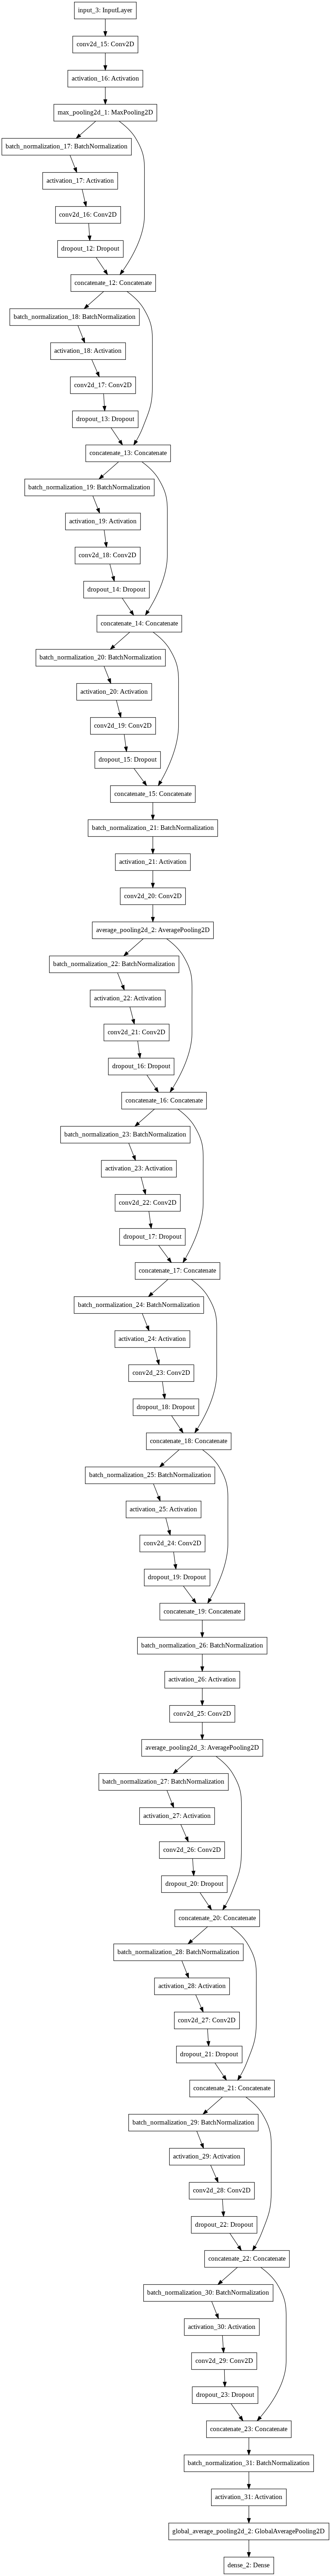

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='DenseNet.png')

In [ ]:
Densenethist=model.fit(training_set, epochs=150, steps_per_epoch = 1062//20, validation_steps = 526//20, shuffle=True, validation_data=val_set)

Epoch 1/150
53/53 [==============================] - 8s 114ms/step - loss: 0.5603 - accuracy: 0.5089 - val_loss: 0.5263 - val_accuracy: 0.4731
Epoch 2/150
53/53 [==============================] - 5s 97ms/step - loss: 0.3404 - accuracy: 0.5448 - val_loss: 0.3769 - val_accuracy: 0.4846
Epoch 3/150
53/53 [==============================] - 5s 99ms/step - loss: 0.2766 - accuracy: 0.4776 - val_loss: 0.2234 - val_accuracy: 0.5115
Epoch 4/150
53/53 [==============================] - 6s 109ms/step - loss: 0.1928 - accuracy: 0.5201 - val_loss: 0.1518 - val_accuracy: 0.5038
Epoch 5/150
53/53 [==============================] - 5s 103ms/step - loss: 0.2498 - accuracy: 0.4800 - val_loss: 0.1298 - val_accuracy: 0.4885


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


Epoch 6/150
53/53 [==============================] - 6s 109ms/step - loss: 0.2174 - accuracy: 0.5081 - val_loss: 0.1013 - val_accuracy: 0.5038
Epoch 7/150
53/53 [==============================] - 6s 109ms/step - loss: 0.2435 - accuracy: 0.4780 - val_loss: 0.0808 - val_accuracy: 0.4615
Epoch 8/150
53/53 [==============================] - 6s 106ms/step - loss: 0.1556 - accuracy: 0.4612 - val_loss: 0.0402 - val_accuracy: 0.5462
Epoch 9/150
53/53 [==============================] - 5s 98ms/step - loss: 0.1962 - accuracy: 0.4847 - val_loss: 0.0494 - val_accuracy: 0.4846
Epoch 10/150
53/53 [==============================] - 5s 100ms/step - loss: 0.2221 - accuracy: 0.4463 - val_loss: 0.0556 - val_accuracy: 0.4962
Epoch 11/150
53/53 [==============================] - 5s 103ms/step - loss: 0.1254 - accuracy: 0.4933 - val_loss: 0.0597 - val_accuracy: 0.4731
Epoch 12/150
53/53 [==============================] - 6s 107ms/step - loss: 0.1337 - accuracy: 0.4768 - val_loss: 0.0519 - val_accuracy: 0.51

# Plotting training accuracy and loss

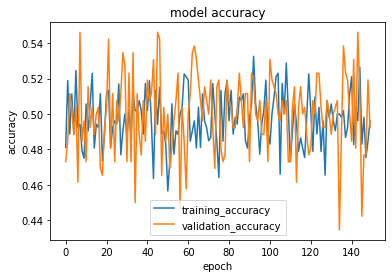

In [ ]:
plt.plot(Densenethist.history['accuracy'][0:220])
plt.plot(Densenethist.history['val_accuracy'][0:220])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training_accuracy', 'validation_accuracy'])
plt.savefig("DenseNet_accuracy.png")
plt.show()

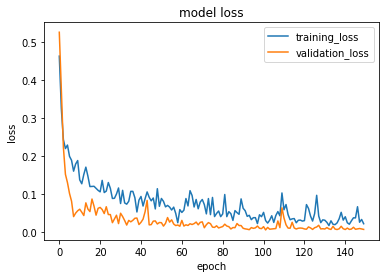

In [ ]:
plt.plot(Densenethist.history['loss'][0:220])
plt.plot(Densenethist.history['val_loss'][0:220])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training_loss', 'validation_loss'])
plt.savefig("DenseNet_loss.png")
plt.show()

# Saving and Loading model

In [ ]:
from tensorflow.keras.models import load_model
from keras.models import model_from_json
from tensorflow.keras.preprocessing.image import load_img, img_to_array

m_json = model.to_json()  
with open("Densenet_model.json", "w") as json_file:  
    json_file.write(m_json)  
model.save_weights("DenseNet_model_Weights.h5") 


In [ ]:
Densenetmodel = model_from_json(open("Saved_Models/Densenet_model.json", "r").read())  
Densenetmodel.load_weights('Saved_Models/DenseNet_model_Weights.h5')

# Testing and Predicting

Pred1 =  [[1.]]
Pred2 =  [[1.]]
Pred3 =  [[1.]]


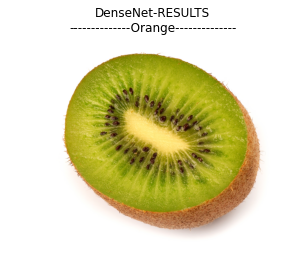

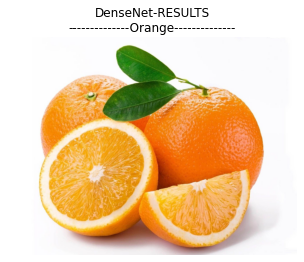

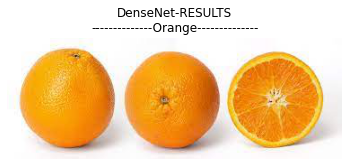

In [ ]:
def process_image(path):
  img = load_img(path, target_size = (64,64))
  img_tensor = img_to_array(img)
  img_tensor = np.expand_dims(img_tensor, axis = 0)
  img_tensor/=255.0
  return img_tensor

path1 = 'Images/kiwi.jpg'
img_original1 = load_img(path1)
path2 = 'Images/orange3.jpg'
img_original2 = load_img(path2)
path3 = 'Images/xyz2.jpg'
img_original3 = load_img(path3)

pred1 = Densenetmodel.predict(process_image(path1))
print("Pred1 = ",pred1)

pred2 = Densenetmodel.predict(process_image(path2))
print("Pred2 = ",pred2)

pred3 = Densenetmodel.predict(process_image(path3))
print("Pred3 = ",pred3)

def show(pred,img):

  if pred>0.5: str = 'DenseNet-RESULTS\n--------------Orange--------------'
  else: str = 'DenseNet-RESULTS\n--------------Not Orange--------------'

  plt.imshow(img)
  plt.axis('off')
  plt.title(str)
  plt.show()

show(pred1,img_original1)
show(pred2,img_original2)
show(pred3,img_original3)